### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 6
### Due: Saturday, Mar 14th at 11.59pm CT
---

This problem has to do with density estimation and clustering. 

1. Read in `hw6_data_1.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


4. Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between $1$ and $10$. Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the $2$-sigma GMM component ellipses. *(Use the code below to help with plotting the ellipses.)*

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import emcee

data = np.load("/Users/kendrajeanjacques/repos/ASTR_3300_S2025/coursework/homeworks/hw_data/hw6_data_1.npy")

In [2]:
# Kludge to fix the bug with draw_ellipse in astroML
from matplotlib.patches import Ellipse

def draw_ellipse(mu, C, scales=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                          (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse(xy=(mu[0], mu[1]),
                          width=2 * scale * sigma1, height=2 * scale * sigma2,
                          angle=alpha * 180. / np.pi,
                          **kwargs))

5. Now try Kmeans clustering with $5$ clusters. 
    - Use the `StandardScalar` to scale the data.
    - Fit the Kmeans model.
    - Find the cluster centers, and then inverse transform thse cluster centers back to the original unscaled coordinates.
    - Predict the labels for the scaled data.
    - Finally, make a two-panel side by side plot showing (a) the original data colored by its labels, then (b) the data colored by the Kmeans predicted labels, with cluster centers superposed.

### Solution

In [57]:
#Import all necessary packages

import numpy as np 
import matplotlib.pyplot as plt 
import emcee
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

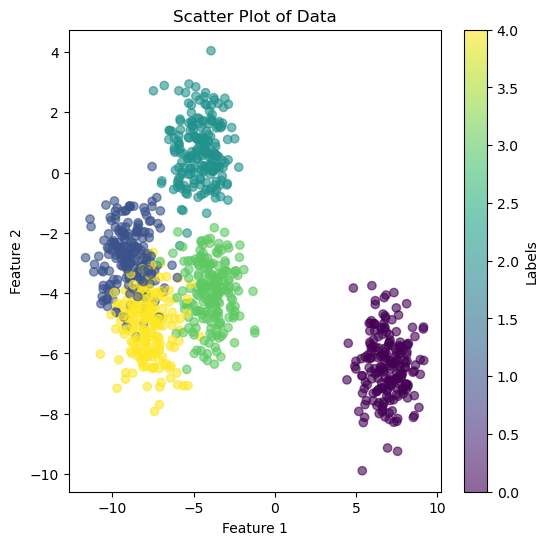

In [58]:
#Part.1
#Load data
#1000 Samples with features
#Last column is labels 

data = np.load("/Users/kendrajeanjacques/repos/ASTR_3300_S2025/coursework/homeworks/hw_data/hw6_data_1.npy")
X, y = data[:, :2], data[:, 2]

#2D scatter Plot
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title("Scatter Plot of Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Labels")
plt.show()

In [59]:
#Part.2
#KDE bandwidth optimization
#Fit KDE with the best bandwidth
# Part 2: KDE bandwidth optimization
# Fit KDE with the best bandwidth


# Define the bandwidth search space
bandwid = np.linspace(0.1, 1.0, 30)

# Perform grid search for the best bandwidth
grid = GridSearchCV(KernelDensity(), {'bandwidth': bandwid}, cv=5)
grid.fit(X)
best_bandwid = grid.best_params_['bandwidth']

# Fit Kernel Density Estimation with the best bandwidth
kde = KernelDensity(bandwidth=best_bandwid)  # Corrected keyword argument
kde.fit(X)

print(f"Optimal KDE bandwidth: {best_bandwid}")

Optimal KDE bandwidth: 0.4724137931034482


<span style="color:red"> NP: missing plot. -1 pt </span>

In [60]:
#Part.3

k_values = range(1, 30)
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    errors.append(1 - knn.score(X, y))

opt_k = k_values[np.argmin(errors)]
print(f"Optimal k for kNN: {opt_k}")

n_components = range(1, 11)
bics, aics = [], []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    bics.append(gmm.bic(X))
    aics.append(gmm.aic(X))

opt_comps = n_components[np.argmin(bics)]
gmm = GaussianMixture(n_components=opt_comps, random_state=42).fit(X)

print(f"Optimal number of GMM components: {opt_comps}")

Optimal k for kNN: 1
Optimal number of GMM components: 4


<span style="color:red"> NP: missing plot. -1 pt </span>

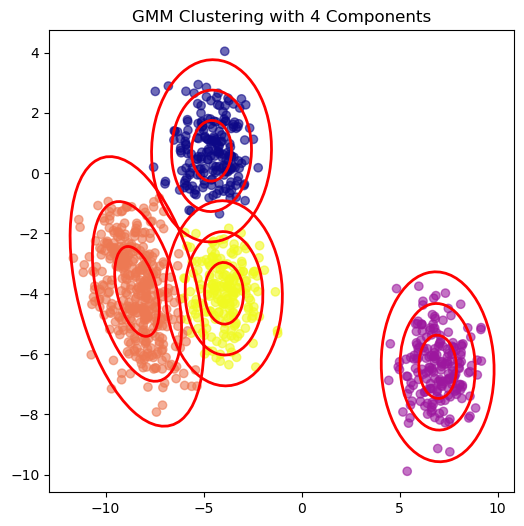

In [46]:
#Part.4
#Code Provided by Dr.NP
# Kludge to fix the bug with draw_ellipse in astroML

def draw_ellipse(mu, C, scales=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]
    
    alpha = 0.5 * np.arctan2(2 * sigma_xy, (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)
    
    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)
    
    for scale in scales:
        ax.add_patch(Ellipse(xy=(mu[0], mu[1]), 
                             width=2 * scale * sigma1, 
                             height=2 * scale * sigma2, 
                             angle=alpha * 180. / np.pi, 
                             **kwargs))
#Code Aded to get scatter Plot
#GMM components between 1 and 10.

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='plasma', alpha=0.6)

for i in range(opt_comps):
    draw_ellipse(gmm.means_[i], gmm.covariances_[i], ax=plt.gca(), edgecolor='red', lw=2, facecolor='none')
    
plt.title(f"GMM Clustering with {opt_comps} Components")
plt.show()

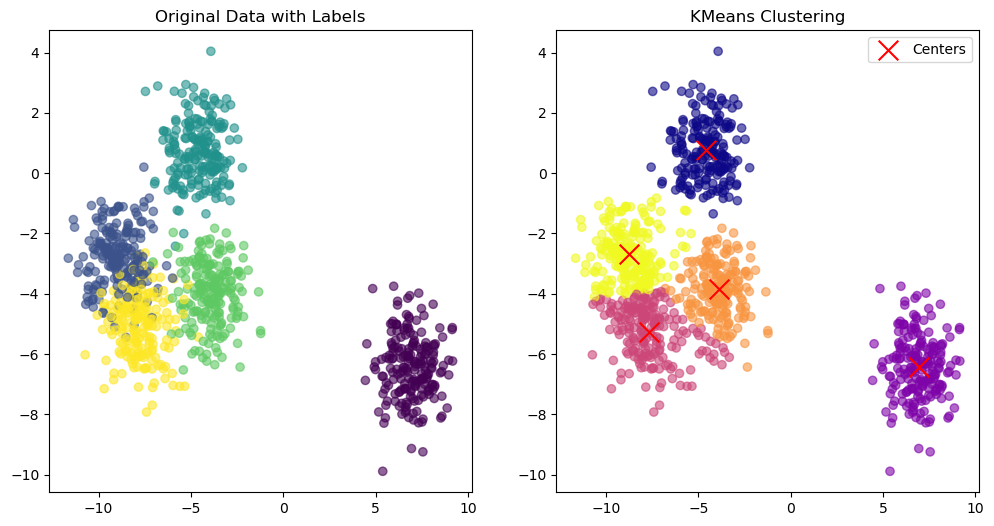

In [56]:
#Part.5
#Plot the KMeans results
#Find the Cluster Centers
#Predict labels for Scaled data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
labels = kmeans.predict(X_scaled)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
axes[0].set_title("Original Data with Labels")

axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', alpha=0.6)
axes[1].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label="Centers")
axes[1].set_title("KMeans Clustering")

plt.legend()
plt.show()